In [1]:
!pip install cantera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Numpy adds some useful numerical types and functions
import numpy as np

# Cantera will handle thermodynamic properties
import cantera as ct

# dataframe
import pandas as pd

# save excel file
from google.colab import files

In [4]:
# International Journal of Emerging Technology and Advanced Engineering
# Website: www.ijetae.com (E-ISSN 2250-2459, Scopus Indexed, ISO 9001:2008 Certified Journal, Volume 13, Issue 03, March 2023)

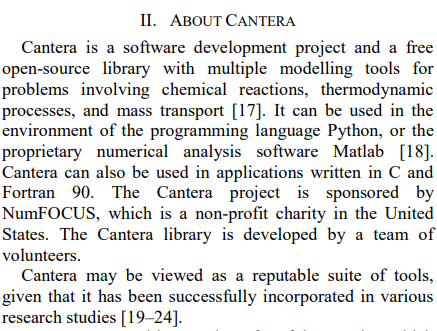

In [5]:
# Create an object to hold the thermodynamic state of water
f = ct.Water()

# Fix the thermodynamic state by specifying temperature and 
# specific volume, in SI units (K and m^3/kg)
f.TV = 673.15, 1e-2

# Evaluating the object provides a summary of its properties at this state
f()


  water:

       temperature   673.15 K
          pressure   1.9936e+07 Pa
           density   100 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   1
   phase of matter   supercritical

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        -1.315e+07       -2.3692e+08  J
   internal energy        -1.335e+07       -2.4051e+08  J
           entropy            9078.4        1.6356e+05  J/K
    Gibbs function       -1.9261e+07       -3.4701e+08  J
 heat capacity c_p            6284.6        1.1322e+05  J/K
 heat capacity c_v              2694             48535  J/K



In [6]:
# Create an object to hold the thermodynamic state of water
agua = ct.Water()

# Fix the thermodynamic state by specifying temperature and 
# specific volume, in SI units (K and m^3/kg)
agua.TV = 293.15, 1000e-2

# Evaluating the object provides a summary of its properties at this state
agua()


  water:

       temperature   293.15 K
          pressure   2333.6 Pa
           density   0.1 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0.17266
   phase of matter   liquid-gas-mix

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.5463e+07       -2.7858e+08  J
   internal energy       -1.5486e+07         -2.79e+08  J
           entropy              5262             94800  J/K
    Gibbs function       -1.7006e+07       -3.0637e+08  J
 heat capacity c_p   inf               inf              J/K
 heat capacity c_v   nan               nan              J/K



In [7]:
agua.DP # densidade e pressao

(0.10000000000000002, 2333.624591715997)

In [8]:
agua.density

0.10000000000000002

In [9]:
# Create an object to hold the thermodynamic state of water
agua_caso_2 = ct.Water()
agua_caso_2.TP = 293.15,101325   # PT=pressure and temperature 

In [10]:
print('densidade:', agua_caso_2.density)
print('presao e temperatura:', agua_caso_2.TP)
print('temperatura ',agua_caso_2.T)
print('pressao',agua_caso_2.P)

densidade: 998.2645414334899
presao e temperatura: (293.15, 101324.99996823864)
temperatura  293.15
pressao 101324.99996823864


In [11]:
Temp = [28,32,36,38,40,42]
alt = [0, 500,1000,1500,1800,2000] # altitude em metros
pres = []
P0 = 101325
T0 = 288.16 
# https://www.engineeringtoolbox.com/air-altitude-pressure-d_462.html
for h in alt:
  P = P0* (1 - 2.25577e-5*h)**5.25588  
  pres.append(P)

In [12]:
print('pressao:',pres)
print('temperatura:',Temp)

pressao: [101325.0, 95460.83402866429, 89874.56042735427, 84555.99052357135, 81489.20599625014, 79495.19743529121]
temperatura: [28, 32, 36, 38, 40, 42]


In [13]:
agua_novo = ct.Water()
ans = []
for T in Temp:
  for P in pres:
    agua_novo.TP = T+273.15,P
    ans.append([agua_novo.T,agua_novo.P,agua_novo.density])
    print(agua_novo.T,agua_novo.P,agua_novo.density)


301.15 101324.99997437873 996.3128562780873
301.15 95460.83400364558 996.3102126554708
301.15 89874.56039849203 996.3076942665075
301.15 84555.99049372773 996.3052965241073
301.15 81489.20597108162 996.3039139248008
301.15 79495.19740980584 996.3030149586103
305.15 101324.99996192771 995.1021555513983
305.15 95460.83400164254 995.0995363565008
305.15 89874.56040408526 995.0970412381414
305.15 84555.99049466953 995.0946656516003
305.15 81489.20596744557 995.0932958279568
305.15 79495.19741224498 995.0924051685146
309.15 101324.99997118482 993.7502097925379
309.15 95460.83398956439 993.7476096949629
309.15 89874.56039833935 993.7451327693418
309.15 84555.9904951335 993.742774504072
309.15 81489.20597159641 993.7414146683525
309.15 79495.19741643005 993.740530503071
311.15 101324.9999653945 993.0244672886947
311.15 95460.83399958041 993.0218748752354
311.15 89874.56039366429 993.0194052697419
311.15 84555.99049412843 993.0170539739557
311.15 81489.20596957812 993.0156981570286
311.15 7949

In [14]:
df = pd.DataFrame(ans, columns=['Temp','Pres','dens'])

In [15]:
df

,Temp,Pres,dens
0,301.15,101324.999974,996.312856
1,301.15,95460.834004,996.310213
2,301.15,89874.560398,996.307694
3,301.15,84555.990494,996.305297
4,301.15,81489.205971,996.303914
5,301.15,79495.197410,996.303015
6,305.15,101324.999962,995.102156
7,305.15,95460.834002,995.099536
8,305.15,89874.560404,995.097041
9,305.15,84555.990495,995.094666


In [16]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# https://mccord.cm.utexas.edu/chembook/page.php?chnum=2&sect=1#:~:text=More%20typical%20is%20around%203,O%2C%20and%201%25%20Ar.

In [17]:
"""
Compute the "equilibrium" and "frozen" sound speeds for a gas

Requires: cantera >= 2.5.0
Keywords: thermodynamics, equilibrium
"""
# https://cantera.org/examples/python/thermo/sound_speed.py.html

import cantera as ct
import math


def equilSoundSpeeds(gas, rtol=1.0e-6, max_iter=5000):
    """
    Returns a tuple containing the equilibrium and frozen sound speeds for a
    gas with an equilibrium composition.  The gas is first set to an
    equilibrium state at the temperature and pressure of the gas, since
    otherwise the equilibrium sound speed is not defined.
    """

    # set the gas to equilibrium at its current T and P
    gas.equilibrate('TP', rtol=rtol, max_iter=max_iter)

    # save properties
    s0 = gas.s
    p0 = gas.P
    r0 = gas.density

    # perturb the pressure
    p1 = p0*1.0001

    # set the gas to a state with the same entropy and composition but
    # the perturbed pressure
    gas.SP = s0, p1

    # frozen sound speed
    afrozen = math.sqrt((p1 - p0)/(gas.density - r0))

    # now equilibrate the gas holding S and P constant
    gas.equilibrate('SP', rtol=rtol, max_iter=max_iter)

    # equilibrium sound speed
    aequil = math.sqrt((p1 - p0)/(gas.density - r0))

    # compute the frozen sound speed using the ideal gas expression as a check
    gamma = gas.cp/gas.cv
    afrozen2 = math.sqrt(gamma * ct.gas_constant * gas.T /
                         gas.mean_molecular_weight)

    return aequil, afrozen, afrozen2

In [18]:
water = ['O2:0.21, N2:0.79','O2:0.20, N2:0.74, H2O:0.05,Ar:0.01']

gas = ct.Solution('gri30.yaml')
ans = []
for T in Temp:
  for P in pres:
    for comp in water:
      gas.TPX = T+273.15,P, comp
      aequil, afrozen, afrozen2 = equilSoundSpeeds(gas)
      ans.append([gas.T,gas.P,gas.density,comp,aequil, afrozen, afrozen2])
      print(gas.T,gas.P,gas.density,aequil, afrozen, afrozen2)
    
df_gas = pd.DataFrame(ans, columns=['Temp','Pres','dens','mix','aequil', 'afrozen', 'afrozen2'])

301.15860624852587 101335.15100536226 1.1675785479499368 348.1498648079967 348.4701550447602 348.4735785717381
301.1585497780668 101335.13254070762 1.1505638516551924 350.70200203693645 350.70259947320113 350.70601230607195
301.15860624892844 95470.3975465352 1.1000051515520426 348.14986537684064 348.4701550430949 348.4735785724169
301.15854977815695 95470.38015046612 1.0839751777155 350.7020019247048 350.7025994786933 350.70601230657104
301.158606248769 89883.56429779304 1.0356339379343713 348.1498592328396 348.4701550453214 348.47357857276836
301.1585497782904 89883.54791959772 1.0205420223114237 350.70200205042414 350.70259947626715 350.7060123070873
301.15860624884124 84564.46156581941 0.9743475019565837 348.1498549713695 348.47015504836895 348.4735785732456
301.15854977842093 84564.44615672714 0.9601486912089137 350.70200218706003 350.7025994785742 350.7060123075945
301.1586062485609 81497.36980002532 0.9390086238396936 348.1498498614523 348.4701550465106 348.4735785733419
301.158

In [19]:
df_gas

,Temp,Pres,dens,mix,aequil,afrozen,afrozen2
0,301.158606,101335.151005,1.167579,"O2:0.21, N2:0.79",348.149865,348.470155,348.473579
1,301.158550,101335.132541,1.150564,"O2:0.20, N2:0.74, H2O:0.05,Ar:0.01",350.702002,350.702599,350.706012
2,301.158606,95470.397547,1.100005,"O2:0.21, N2:0.79",348.149865,348.470155,348.473579
3,301.158550,95470.380150,1.083975,"O2:0.20, N2:0.74, H2O:0.05,Ar:0.01",350.702002,350.702599,350.706012
4,301.158606,89883.564298,1.035634,"O2:0.21, N2:0.79",348.149859,348.470155,348.473579
...,...,...,...,...,...,...,...
67,315.158934,84564.446136,0.917496,"O2:0.20, N2:0.74, H2O:0.05,Ar:0.01",358.653722,358.653963,358.657440
68,315.158989,81497.366559,0.897295,"O2:0.21, N2:0.79",356.116102,356.372502,356.375989
69,315.158934,81497.354930,0.884219,"O2:0.20, N2:0.74, H2O:0.05,Ar:0.01",358.653722,358.653963,358.657440
70,315.158989,79503.158312,0.875338,"O2:0.21, N2:0.79",356.116101,356.372502,356.375989


In [20]:
Arq = "gas_output.xlsx"
df_gas.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from sklearn import preprocessing




d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
df = scaled_df

In [22]:
df

,Temp,Pres,dens
0,0.002972,0.999947,0.009832
1,0.003155,0.999941,0.010436
2,0.003351,0.999933,0.011085
3,0.003561,0.999924,0.011782
4,0.003695,0.999918,0.012225
5,0.003788,0.999914,0.012532
6,0.003011,0.999947,0.009820
7,0.003196,0.999941,0.010424
8,0.003395,0.999933,0.011071
9,0.003609,0.999924,0.011768


In [23]:
# https://cantera.org/documentation/docs-2.6/sphinx/html/cython/thermo.html

In [24]:
# https://mljar.com/blog/feature-importance-in-random-forest/